# Lecture 2.3: Case Studies

<div style="border: 1px double black; padding: 10px; margin: 10px">
   
**Goals in this lecture:**
    
* We will go through the data set `mpg` by answering several questions using plots
* We will then try to understand the millenials betteer

</div>



We start with the `mpg` data set.  

In [1]:
library(tidyverse)
print(mpg)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# A tibble: 234 x 11
   manufacturer model    displ  year   cyl trans   drv     cty   hwy fl    class
   <chr>        <chr>    <dbl> <int> <int> <chr>   <chr> <int> <int> <chr> <chr>
 1 audi         a4         1.8  1999     4 auto(l… f        18    29 p     comp…
 2 audi         a4         1.8  1999     4 manual… f        21    29 p     comp…
 3 audi         a4         2    2008     4 manual… f        20    31 p     comp…
 4 audi         a4         2    2008     4 auto(a… f        21    30 p     comp…
 5 audi         a4         2.8  1999     6 auto(l… f        16    26 p     comp…
 6 audi         a4         2.8  1999     6 manual… f        18    26 p     comp…
 7 audi         a4         3.1  2008     6 auto(a… f        18    27 p     comp…
 8 audi         a4 quat…   1.8  1999     4 manual… 4        18    26 p     comp…
 9 audi         a4 quat…   1.8  1999     4 auto(l… 4        16    25 p     comp…
10 audi         a4 quat…   2    2008     4 manual… 4        20    28 p     comp…
# … wit

Make a scatterplot of year vs highway gas mileage. 

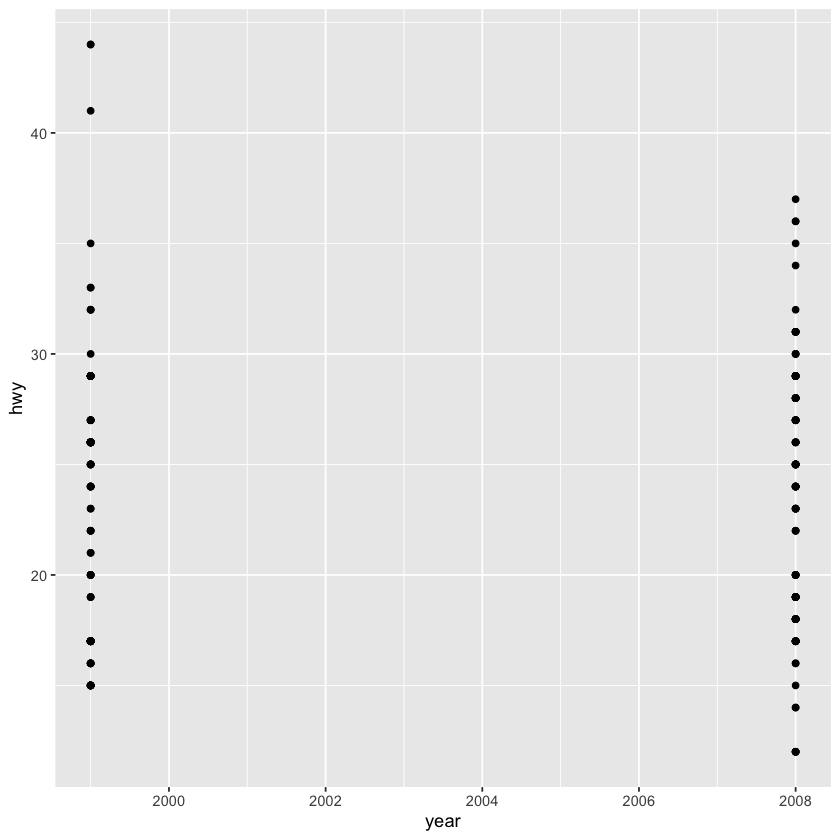

In [5]:
ggplot() + geom_point(data = mpg, aes(x = year, y = hwy))

It turns out that there are only two years represented in the data, not really enought to paint a full picture over time. Instead we can treat year as a categorical variable and look at the distribution of **hwy** within each value of year. For this we will use a new geom called ``boxplot``:

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


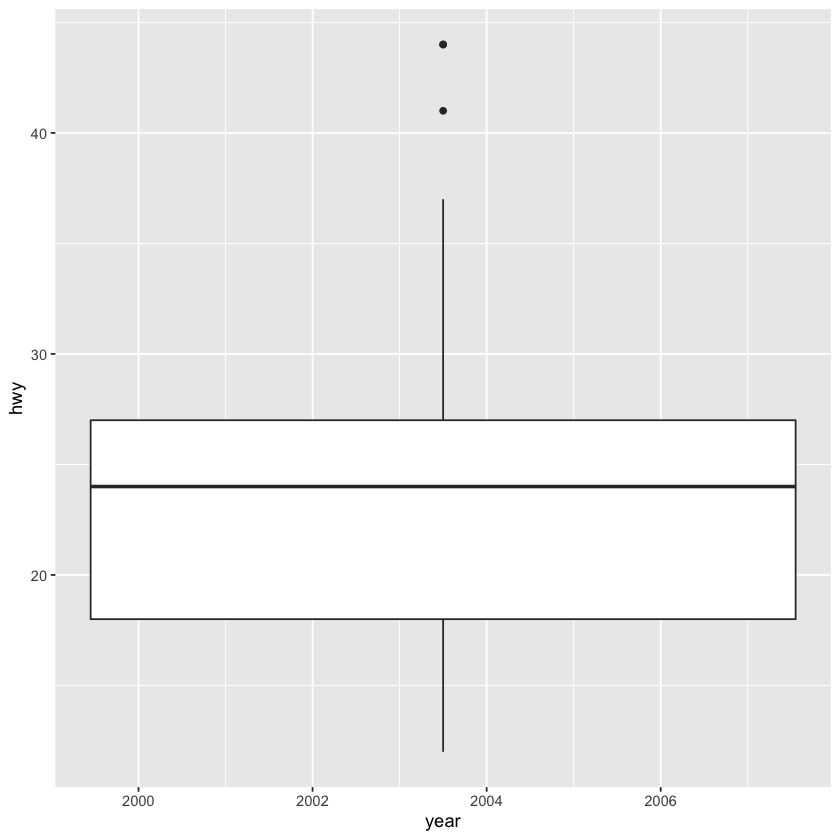

In [6]:
ggplot() + geom_boxplot(data = mpg, mapping = aes(x=year, y=hwy))

This doesn't quite do what we want. Just like the warning message says, the problem is that the **year** variable is continuous. However since we have only a few different values of year in our data set, we need to tell R that we want to temporarily think of it as discrete. The way to do this is by converting **year** to a factor:

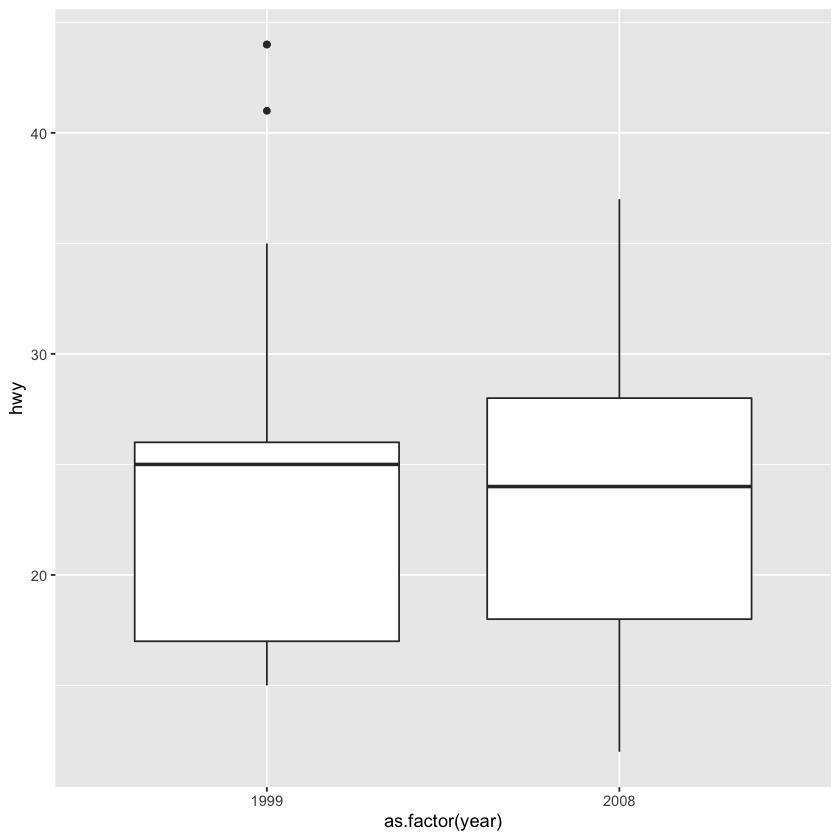

In [7]:
ggplot() + geom_boxplot(data = mpg, mapping = aes(x=as.factor(year), y=hwy))

The boxplot displays the following information: 
*  minimum
*  maximum
*  25% Quartile
*  75% Quartile
*  median

Surprisingly, the median highway gas mileage went down from 1999 to 2008. Why might this be? Let's try plotting the fraction of car types represented in each data set. To do this we will plot a bar chart. This takes one aesthetic called `x=` and makes a plot with the number of times that each (discrete) value of `x` appears in the data set. Here is an example which counts the number of cars in each class:

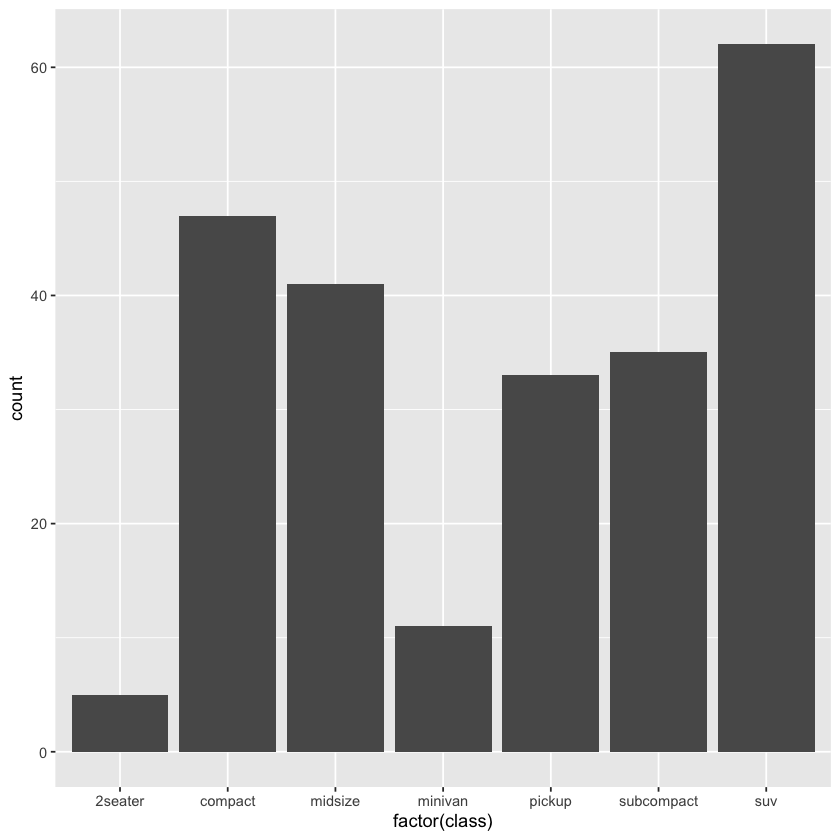

In [8]:
ggplot(mpg) + geom_bar(aes(x=factor(class)))

We will now make a plot of the number of different auto classes in 1999 vs 2008:

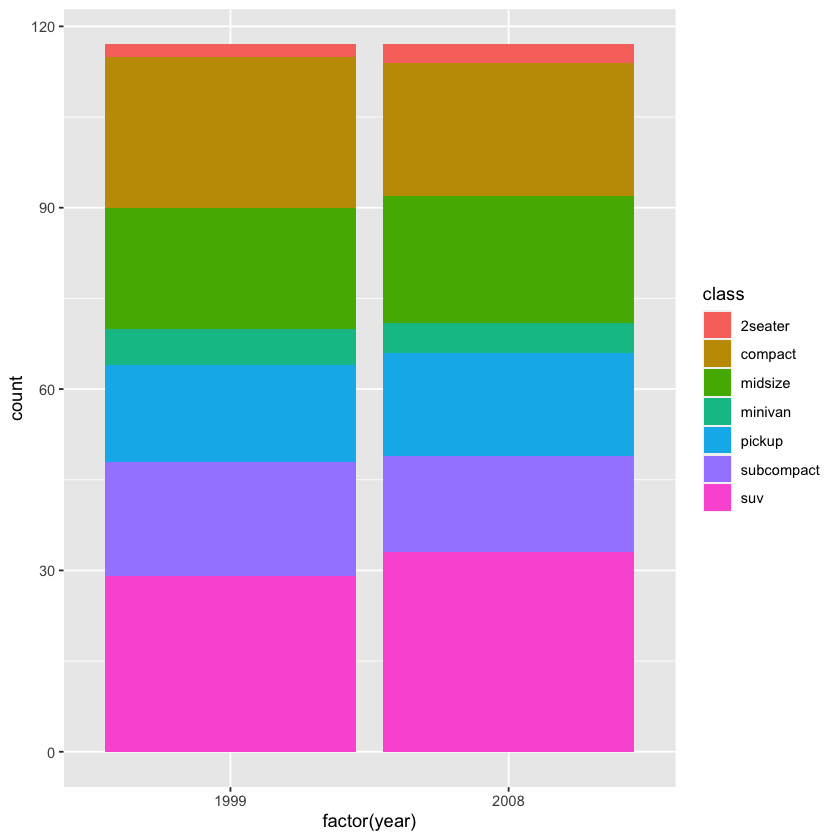

In [9]:
ggplot(mpg) + geom_bar(aes(x=factor(year), fill=class))

##  Understaning Millenials 

## Millenials
Next we will focus on data set released by the [Pew Research Center](https://www.pewsocialtrends.org/2010/02/24/millennials-confident-connected-open-to-change/) on ... millennials!

![millennials](https://images2.minutemediacdn.com/image/upload/c_crop,h_1189,w_2119,x_0,y_225/f_auto,q_auto,w_1100/v1561494201/shape/mentalfloss/586493-istock-862201574.jpg)

The data set we will analyze is based on a survey of about 2,000 people done in 2011:

In [13]:
load("millennials.RData")
head(mil)

age,state,q1,q8a,q8b,q8c,q8d,q8e,q8f,q8g,⋯,q44g,q44i,q45a,q46,employ,lwp,finan,home2,educ,health
<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
28,NY,Very happy,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Not important,Very important but not the most,⋯,NA,NA,No,NA,Full-time,NA,No,Rent,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
33,NE,Very happy,Not important,One of the most important things,One of the most important things,Very important but not the most,Very important but not the most,Not important,One of the most important things,⋯,NA,NA,Yes,1,Part-time,NA,No,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
45,IN,Pretty happy,Somewhat important,One of the most important things,Somewhat important,One of the most important things,Somewhat important,Not important,Somewhat important,⋯,Yes,No,No,NA,Not employed,Lived with current spouse before married,NA,NA,"College graduate (B.S., B.A., or other 4-year degree)",Covered by health insurance
66,IN,Very happy,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Somewhat important,Not important,Very important but not the most,⋯,NA,NA,No,NA,Part-time,NA,NA,NA,High school incomplete (Grades 9-11),Covered by health insurance
52,VA,Very happy,One of the most important things,Very important but not the most,Very important but not the most,One of the most important things,Somewhat important,Not important,Very important but not the most,⋯,Yes,Yes,No,NA,Full-time,Lived with both current spouse and someone else,NA,NA,"College graduate (B.S., B.A., or other 4-year degree)",Covered by health insurance
VOL DON'T KNOW/REFUSED,MD,Very happy,Somewhat important,One of the most important things,One of the most important things,Very important but not the most,Somewhat important,Not important,(VOL) Don't know/Refused,⋯,NA,Yes,No,NA,Not employed,NA,NA,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance


Each column of the data corresponds to one of the question asked during the survey. You can find the full script in the `Millennials_Ques.pdf` in Canvas or Github.

## Bar charts
Let us try to explore Question 20 in the pdf:

    Q.20	How often do you visit the social networking site you use most often… several times a day, about once a day, every few days, once a week or less often?
    
Plot a barchart to visualize the data collected for answering Question 20. 

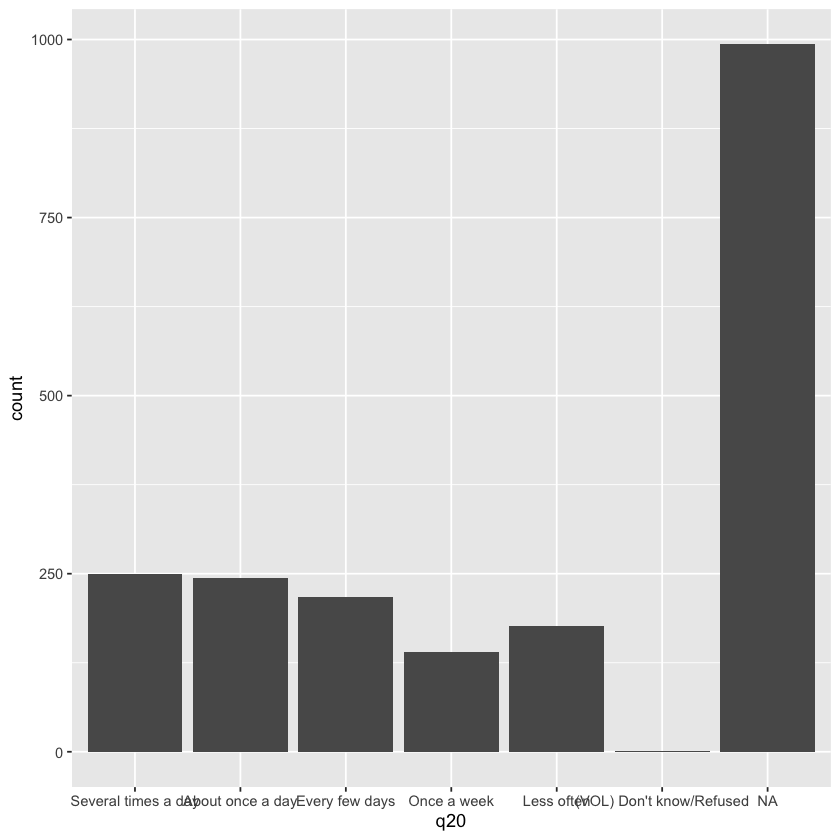

In [14]:
ggplot(data = mil) + geom_bar(mapping = aes(x = q20))

As we can see from the plot, there are a lot of missing values. Moreover, the labels on the `x-axis` overlaps with each other.  We will now plot those bars on the `y-axis` to avoid overlapping labels.

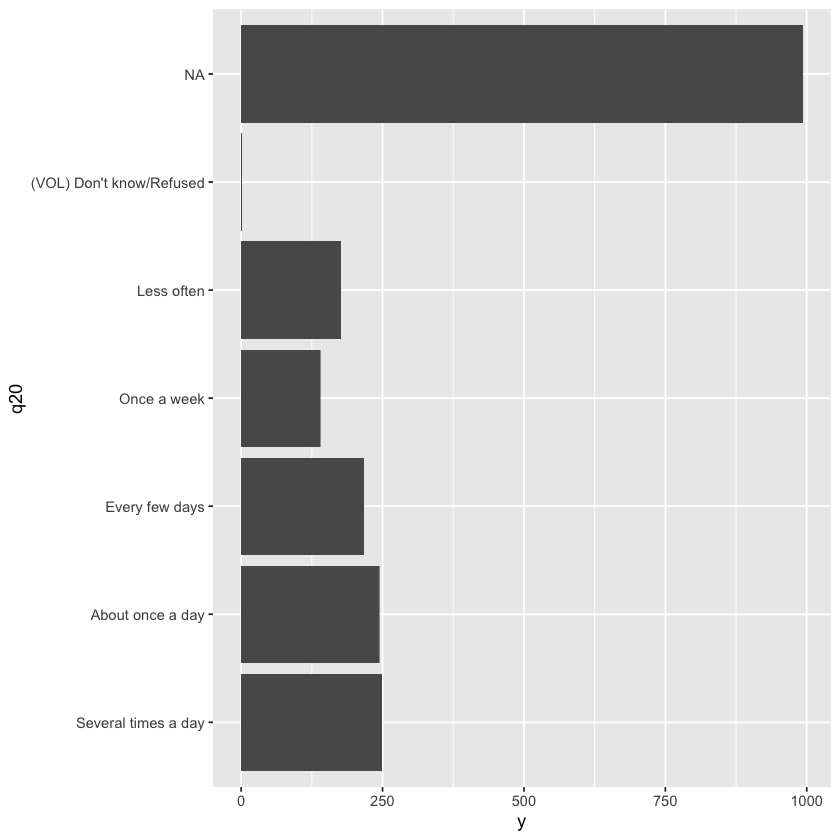

In [36]:
ggplot(data = mil) +
    geom_col(mapping = aes(x = q20,  y = 1)) + coord_flip()

Let's try to improve the plot by introducing colors to the bar charts. 

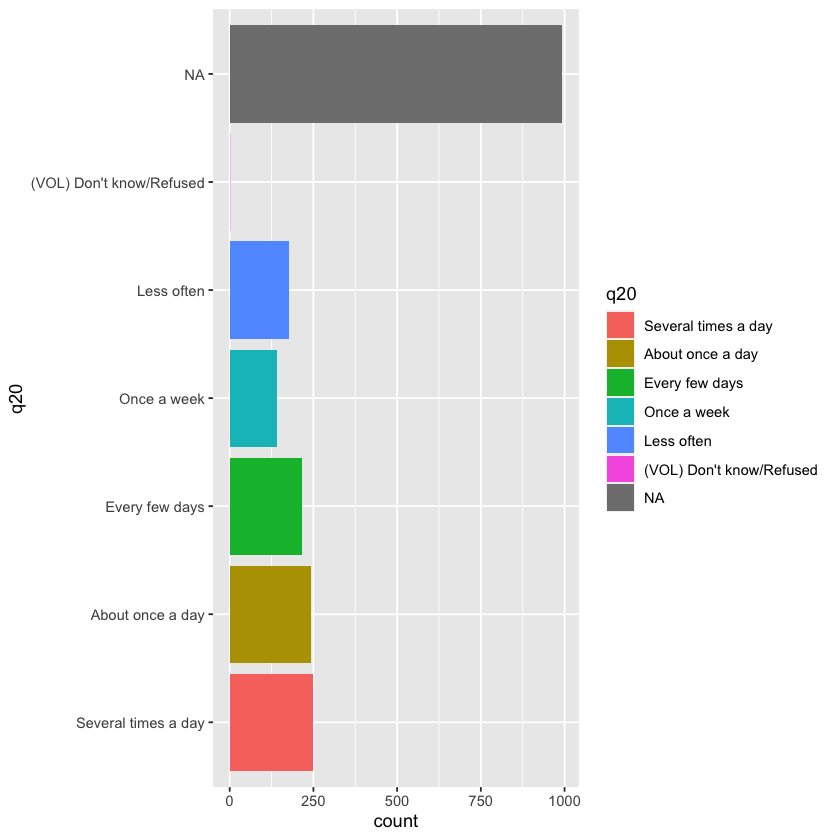

In [38]:
ggplot(data = mil) + geom_bar(mapping = aes(x = q20, fill = q20)) + coord_flip()

What happens when we map the `fill` aesthetic to some variable other than `q20`? For example, let's visualize social media usage relative to the response to the question:

    EMPLOY	How much are you employed?

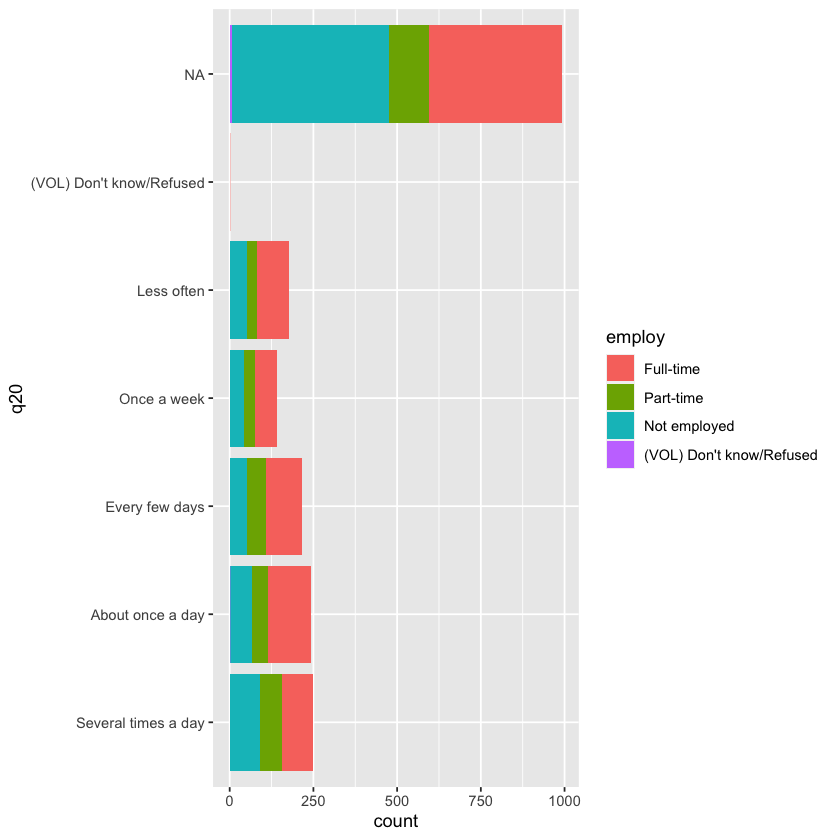

In [40]:
ggplot(data = mil) + geom_bar(mapping = aes(x = q20, fill = employ)) + coord_flip()

We could also remove the missing values before we plot.

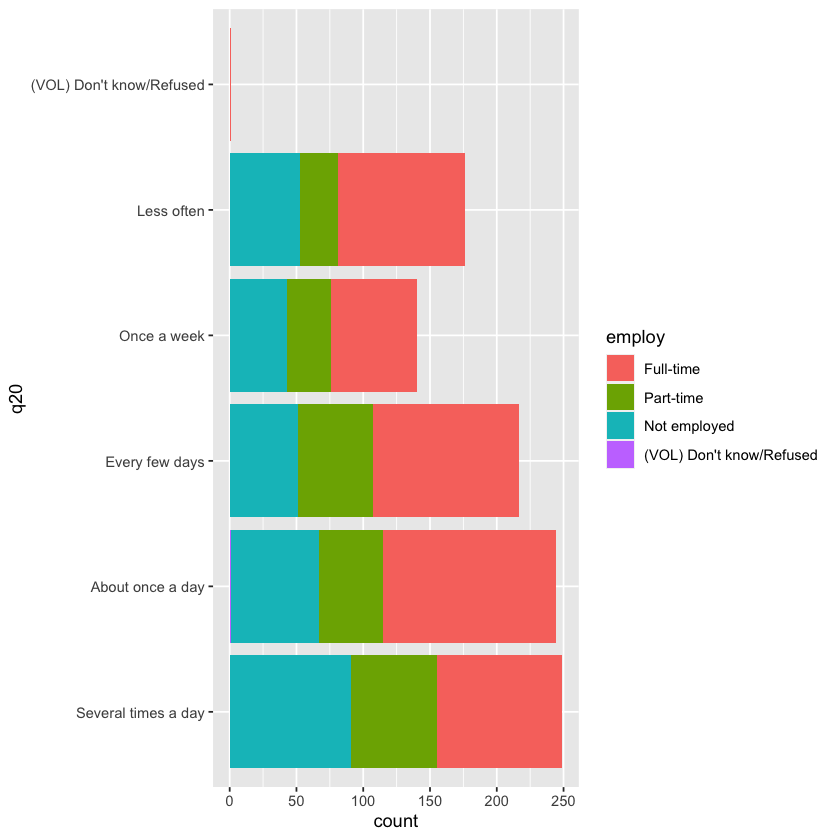

In [41]:
ggplot(data = filter(mil, !is.na(q20))) +
    geom_bar(mapping = aes(x = q20, fill = employ)) + coord_flip()

What if we want to compare the proportion of employment status for each q20.

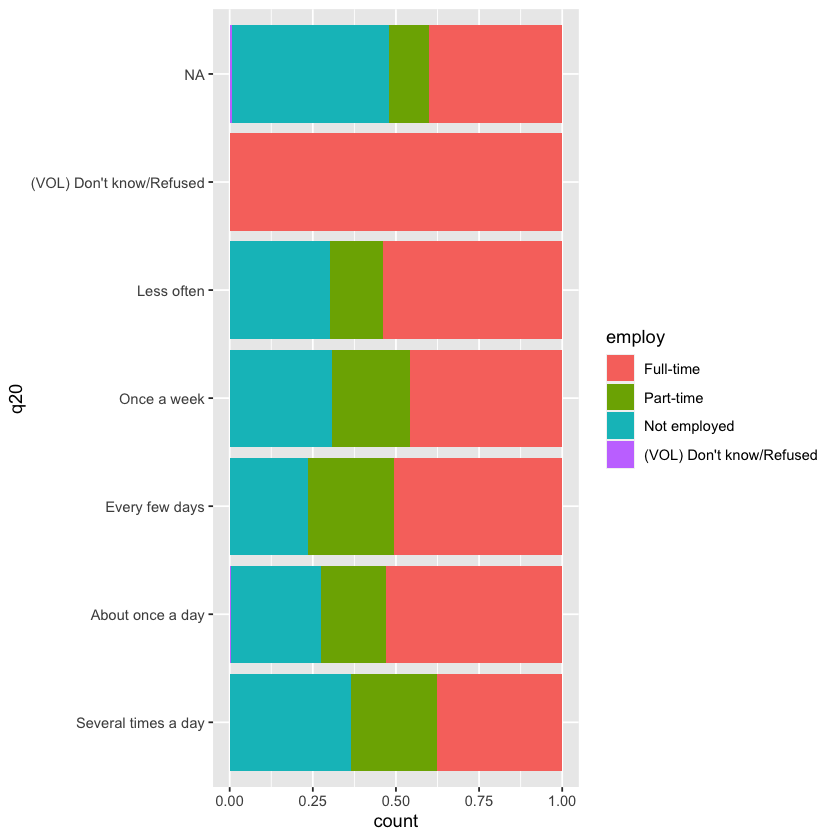

In [42]:
ggplot(data = mil) +
    geom_bar(mapping = aes(x = q20, fill = employ), 
             position = "fill") + coord_flip()

### Pie Charts

Let's try plotting a piechart to explore the question 

    Q.36	How closely do you watch the amount of money you spend?

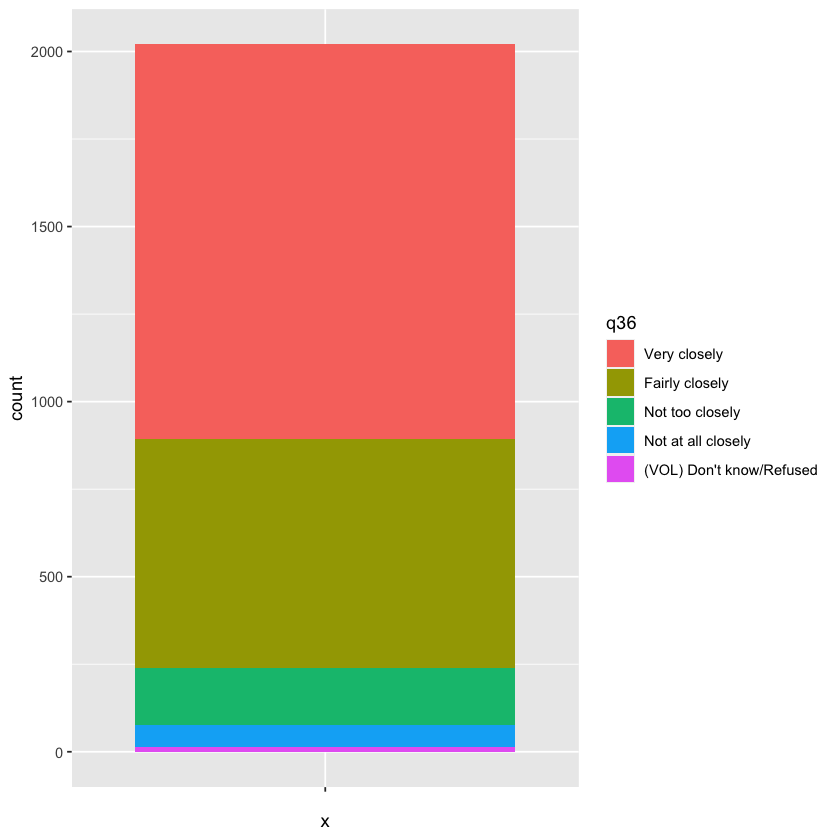

In [43]:
ggplot(mil) + geom_bar(aes(x="", fill=q36)) 

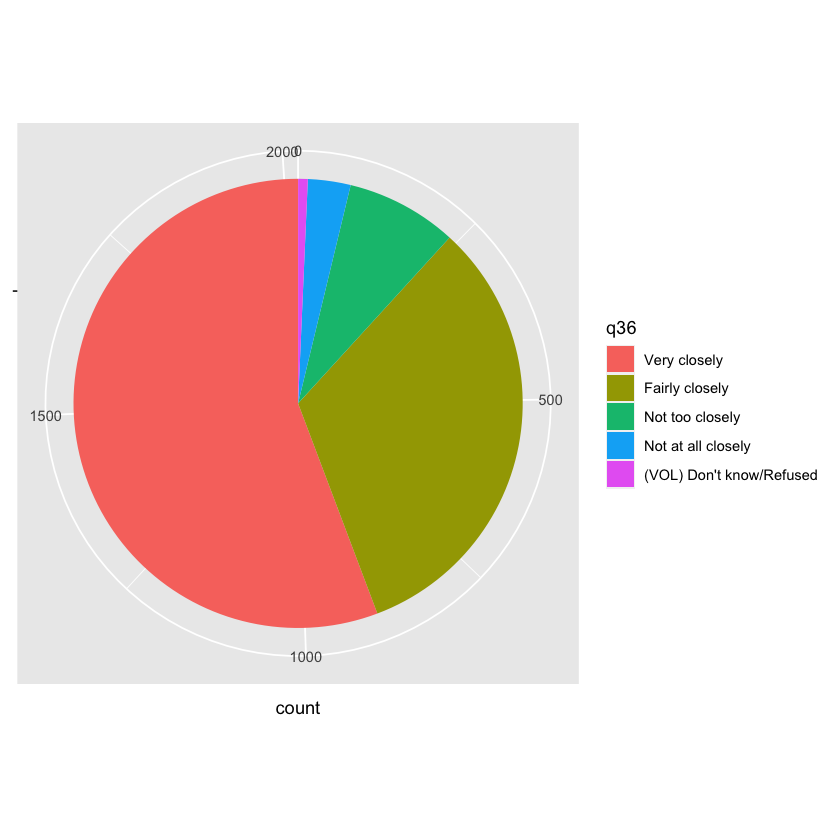

In [47]:
ggplot(mil) + geom_bar(aes(x="", fill=q36)) + labs(x = NULL) + coord_polar(theta="y") 

From the piechart, we learn that majority of millenials tend to be more financially responsible and tend to monitor their spending very closely and fairly closely.  

### Facets

We already saw how to add a third variable to a scatter plot by using a color aesthetics. **Facets** provide another way to stratify plots by additional variables. Let's look at responses to:
    
    AGE.    What is your age?
    Q44g.	Have you ever sent or received a text message while driving?
    Q44i.	Have you ever placed your cell phone on or right next 
            to your bed while sleeping?

Plot boxplots for age segregated by Q44g.  

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 33 rows containing non-finite values (stat_boxplot).”


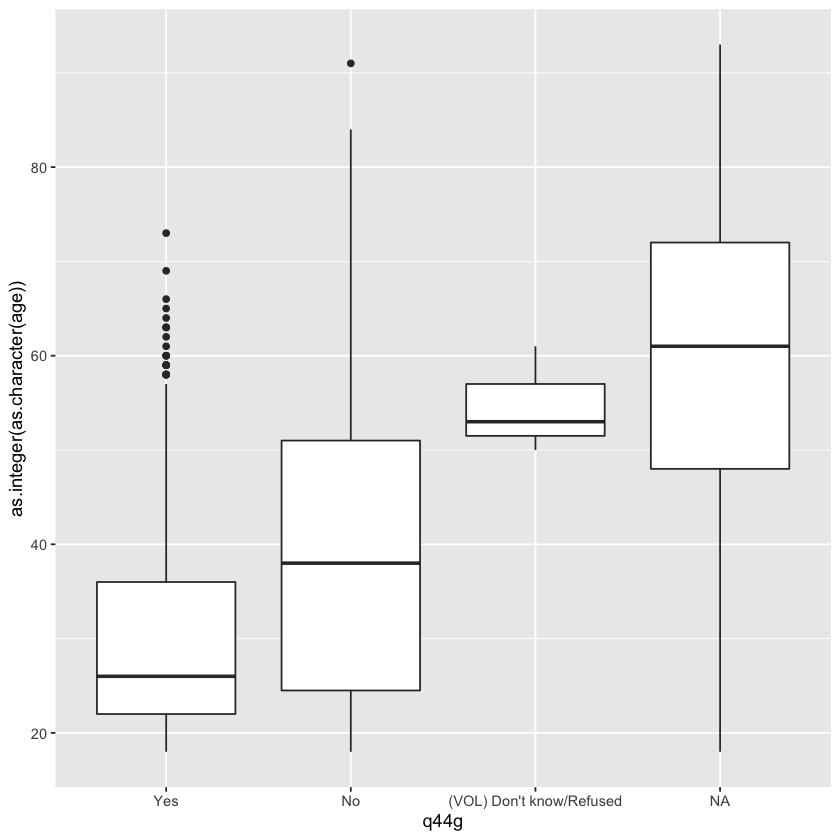

In [50]:
ggplot(mil) + geom_boxplot(aes(x=q44g, y=as.integer(as.character(age))))

What if we want to understand a combination of Q44g and Q44i?

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 33 rows containing non-finite values (stat_boxplot).”


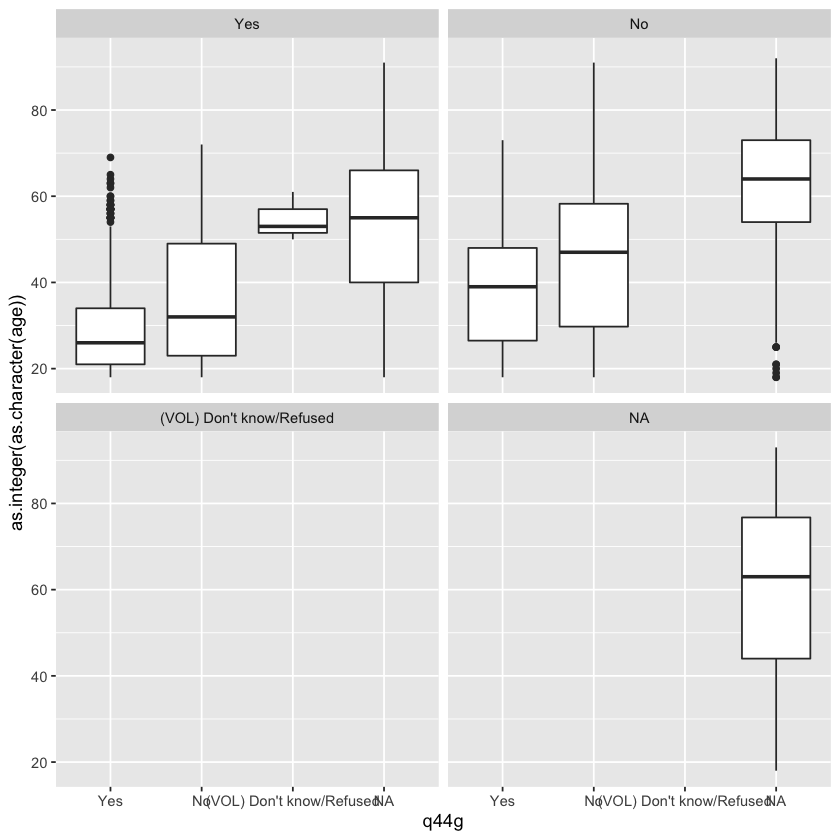

In [51]:
ggplot(mil) + geom_boxplot(aes(x=q44g, y=as.integer(as.character(age)))) + facet_wrap(~ q44i)

## Other interesting questions
Here are all the question definitions in this data set: 

Q.8	Please tell me how important each is to you personally.
	a.	Being successful in a high-paying career or profession 
	b.	Having a successful marriage 
	c.	Living a very religious life 
	d.	Being a good parent 
	e.	Having lots of free time to relax or do things you want to do 
	f.	Becoming famous 
	g.	Helping other people who are in need 
	h.	Owning your own home 

    Q.20	How often do you visit the social networking site you use most often.
    
    Q.25 	Thinking about the past 24 hours, about how many text messages did you send and receive on your cell phone? 

    Q.36	How closely do you watch the amount of money you spend?
    
    Q. 41   Do you strongly favor, favor, oppose, or strongly oppose allowing gay and lesbian couples to marry legally?
    
    Q.44	
        a.	Do you recycle paper, plastic or glass from home? 
        b.	Do you have a close friend or family member who is gay? 
        c.	Do you happen to have any guns, rifles or pistols in your home? 
        d.	Have you ever posted a video of yourself online? 
        g.	Have you ever sent or received a text message while driving?
        i.	Have you ever placed your cell phone on or right next to your bed while sleeping?
    
    Q.46	How many tattoos do you have?
    
    HOME2	Do you own your home, rent, live in a dorm or live with your parents?
    LWP2 	Have you ever lived together with a partner without being married, or not?
    HEALTH	Are you, yourself, now covered by any form of health insurance or health plan or are you not covered at this time?
    FINAN	Do you depend on your parents or other family members for financial assistance, or not? 
    EDUC	What is the last grade or class that you completed in school? 
    AGE     How old are you?